In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image

%load_ext autoreload
%autoreload 1
%aimport notebook_utils

sns.set_context('notebook', font_scale=1.5)
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load training data

In [4]:
root = '/Users/primdal/lustre/pulling/predict_bipy/'
model_root = root + 'models/'
csv_path = model_root + 'tun-mol-performance.csv'
df = pd.read_csv(csv_path)
df.sort_values(by='holdout_loss', inplace=True)
df['rank'] = range(len(df))

In [5]:
df.head()

,basename,best_epoch,best_val_acc,best_val_loss,extra_dense,holdout_acc,holdout_loss,lower_cutoff,n_nodes,network,upper_cutoff,rank
18,recurrent_unit_gru__n_nodes_8__extra_dense_Tru...,223,1.000000,0.000255,extra_dense_True,1.000000,0.013241,lower_cutoff_1e-07,n_nodes_8,recurrent_unit_gru,upper_cutoff_0.1,0
26,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,115,1.000000,0.014703,extra_dense_True,1.000000,0.015073,lower_cutoff_1e-06,n_nodes_6,recurrent_unit_lstm,upper_cutoff_0.1,1
10,recurrent_unit_gru__n_nodes_10__extra_dense_Tr...,140,1.000000,0.001788,extra_dense_True,1.000000,0.015924,lower_cutoff_1e-06,n_nodes_10,recurrent_unit_gru,upper_cutoff_0.1,2
6,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,163,1.000000,0.005650,extra_dense_True,0.977778,0.025797,lower_cutoff_1e-07,n_nodes_6,recurrent_unit_lstm,upper_cutoff_0.1,3
12,recurrent_unit_lstm__n_nodes_10__extra_dense_F...,72,0.955556,0.141733,extra_dense_False,1.000000,0.025896,lower_cutoff_1e-06,n_nodes_10,recurrent_unit_lstm,upper_cutoff_0.1,4


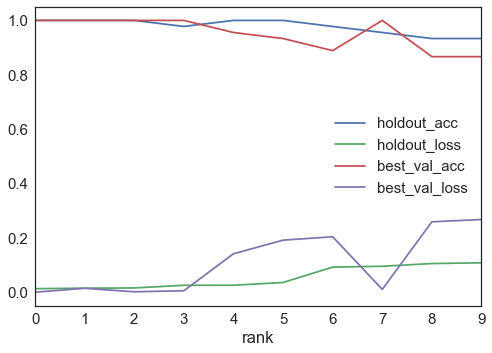

In [6]:
notebook_utils.plot_ranked_performance(df, top=10)

# Load data with other seed

In [6]:
csv_path = model_root + 'tun-mol-seed-2-performance.csv'
df_verify = pd.read_csv(csv_path)
df_verify.sort_values(by='holdout_loss', inplace=True)
df_verify['rank'] = range(len(df_verify))

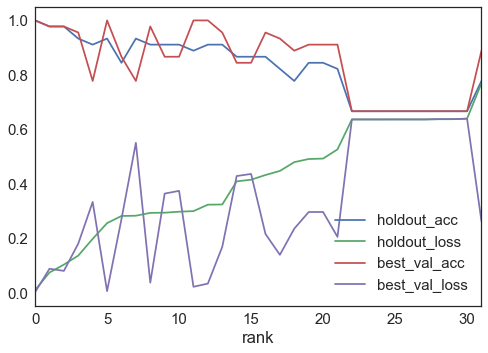

In [7]:
df_verify.plot(x='rank',y=['holdout_acc', 'holdout_loss', 'best_val_acc', 'best_val_loss'])

# Combine results

In [8]:
assert len(df) == len(df_verify)

In [9]:
df_combined = df[['basename']].copy()

In [10]:
for col in ['best_val_acc', 'best_val_loss', 'holdout_acc', 'holdout_loss']:
    ave = (df[col].values + df_verify[col].values)/2
    df_combined.loc[:,col] = ave

In [11]:
df_combined.sort_values(by='holdout_loss', inplace=True)
df_combined['rank'] = range(len(df_combined))

# Top 1

In [12]:
df_combined.loc[df_combined.holdout_loss.idxmin(),'basename']

'recurrent_unit_gru__n_nodes_8__extra_dense_True__upper_cutoff_0.1__lower_cutoff_1e-07'

# Top 10

In [13]:
df_top10 = df_combined[df_combined['rank'] < 10]

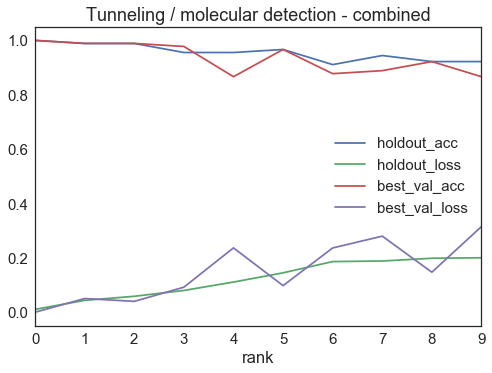

In [14]:
df_top10.plot(x='rank',y=['holdout_acc', 'holdout_loss', 'best_val_acc', 'best_val_loss'])
plt.title('Tunneling / molecular detection - combined')
#plt.savefig('../reports/figures/tun-mol-models-rank.png')

In [15]:
df_top10

,basename,best_val_acc,best_val_loss,holdout_acc,holdout_loss,rank
18,recurrent_unit_gru__n_nodes_8__extra_dense_Tru...,1.000000,0.001320,1.000000,0.011708,0
26,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,0.988889,0.051616,0.988889,0.044855,1
10,recurrent_unit_gru__n_nodes_10__extra_dense_Tr...,0.988889,0.041170,0.988889,0.059822,2
6,recurrent_unit_lstm__n_nodes_6__extra_dense_Tr...,0.977778,0.093247,0.955556,0.081271,3
12,recurrent_unit_lstm__n_nodes_10__extra_dense_F...,0.866667,0.237648,0.955556,0.112090,4
31,recurrent_unit_gru__n_nodes_6__extra_dense_Fal...,0.966667,0.098988,0.966667,0.145993,5
20,recurrent_unit_lstm__n_nodes_4__extra_dense_Fa...,0.877778,0.237414,0.911111,0.187377,6
21,recurrent_unit_gru__n_nodes_8__extra_dense_Fal...,0.888889,0.280809,0.944444,0.189430,7
0,recurrent_unit_lstm__n_nodes_4__extra_dense_Tr...,0.922222,0.148309,0.922222,0.199596,8
30,recurrent_unit_lstm__n_nodes_4__extra_dense_Tr...,0.866667,0.316062,0.922222,0.201366,9
